# EP da P1 - PSI3471

# Nome: Antônio Augusto Carnevalli

# NºUSP: 13682909

O problema consiste em classificar um paciente como portador ou não de uma doença (classificação binária).

In [ ]:
# Importando os dados de treino e de teste via web
# Os dados já estão processados, então não será necessário realizar um tratamento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train = pd.read_csv(
    "https://media.githubusercontent.com/media/psi3471/datasets/main/disease_prediction/disease_train.csv"
).drop(columns=["Unnamed: 0"])

# Separando entradas e saídas
x_train = data_train.iloc[:, :-1]
x_train = x_train.to_numpy()

y_train = data_train.iloc[:, -1]
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1, 1)

print(x_train.shape)
print(y_train.shape)


data_test = pd.read_csv(
    "https://media.githubusercontent.com/media/psi3471/datasets/main/disease_prediction/disease_test.csv"
).drop(columns=["Unnamed: 0"])
x_test = data_test.iloc[:, :-1]
x_test = x_test.to_numpy()

y_test = data_test.iloc[:, -1]
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

print(x_test.shape)
print(y_test.shape)


data_train.shape

(614, 8)
(614, 1)
(154, 8)
(154, 1)


(614, 9)

In [ ]:
data_test.shape

(154, 9)

In [ ]:
data_train.head()

,0,1,2,3,4,5,6,7,8
0,6.000000,123.0,72.0,45.000000,230.000000,33.6,0.733,34.0,0.0
1,7.000000,159.0,66.0,20.536458,79.799479,30.4,0.383,36.0,1.0
2,3.845052,127.0,80.0,37.000000,210.000000,36.3,0.804,23.0,0.0
3,3.845052,105.0,64.0,41.000000,142.000000,41.5,0.173,22.0,0.0
4,3.000000,111.0,56.0,39.000000,79.799479,30.1,0.557,30.0,0.0


In [ ]:
data_test.head()

,0,1,2,3,4,5,6,7,8
0,4.0,132.0,69.105469,20.536458,79.799479,32.9,0.302,23.0,1.0
1,9.0,145.0,80.000000,46.000000,130.000000,37.9,0.637,40.0,1.0
2,9.0,156.0,86.000000,28.000000,155.000000,34.3,1.189,42.0,1.0
3,4.0,137.0,84.000000,20.536458,79.799479,31.2,0.252,30.0,0.0
4,4.0,171.0,72.000000,20.536458,79.799479,43.6,0.479,26.0,1.0


In [ ]:
# Criando o modelo de Regrssão Logística para fins de comparação
# O modelo de Regressão Logística consiste em um modelo que utiliza a função de ativação
# Sigmoidal e um único Neurônio

def logistica_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = logistica_minibatch(x, y, eta, Nt, Ne, Nb, dw)
    x: sinal de entrada
    y: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: desvio padrão para inicialização de w
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor, 
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """

    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = dw * np.random.uniform(-1, 1, (Ne * Nmb + 1, M + 1))    
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    eta = eta / Nb
    for k in range(Ne):
        np.random.shuffle(Xd)
        x = Xd[:, 0 : M + 1]
        d = Xd[:, [M + 1]]
        for l in range(Nmb):
            m = k * Nmb + l
            dmb = d[l * Nb : (l + 1) * Nb]
            xmb = x[l * Nb : (l + 1) * Nb, :]
            emb = dmb - sigmoid(xmb @ W[[m], :].T)
            Gmb = xmb.T @ emb            
            W[[m + 1], :] = W[[m], :] + eta * Gmb.T

    return W


In [ ]:
# Criando a função sigmoidal
def sigmoid(z):
  z = (1/(1+np.exp(-z)))
  return z

# Definição de Parâmetros da Regressão Logística
Nt_log = x_train.shape[0]
eta_log = 0.001
Nb_log = 20
Ne_log = 200
dw_log = 0.002
W_log = logistica_minibatch(x_train, y_train, eta_log, Nt_log, Ne_log, Nb_log, dw_log)
it_final_log = Ne_log * int(np.floor(Nt_log / Nb_log))
Wfinal_log = W_log[[it_final_log], :]
print(Wfinal_log)



[[-0.15955649  0.58263039  0.11501303 -0.25606833 -0.0177784   0.01922064
   0.11505752  0.04702897  0.06335027]]


In [ ]:
# Calculando a viabilidade da Regressão Logística
# MSE não será adequado para esse problema pois é uma classificação binária, 
# devemos medir a acertidão de cada caso possível. 
# Ou seja, o quão certo ele é quando afirma positivo, ou quão certo quando afirma negativo

y_log = np.hstack((np.ones((x_test.shape[0], 1)), x_test)) @ Wfinal_log.T

# Limitando o threshold da função, pois a saída é binária
for y in range(len(y_log)):
  if y_log[y] > 0.5:
    y_log[y] = 1
  else:
    y_log[y] = 0

y_log = y_log
print(y_log.shape)
#taxa_de_erro_log = (np.sum((y_test - (y_log))**2))/ (y_test.shape[0])
#print(f'O MSE foi de {taxa_de_erro_log}')

# Primeiro calcularemos a quantidade de Verdadeiros Positivos e de Verdadeiros Negativos,
# Falso Positivos e Falsos Negativos
VP = 0
VN = 0
FN = 0
FP = 0
for i in range(len(y_log)):
  if (y_log[i] == 0) and (y_log[i] == y_test[i]):
    VN+=1
  elif (y_log[i] == 1) and (y_log[i] == y_test[i]):
    VP+=1
  elif (y_log[i] == 0) and (y_log[i] != y_test[i]):
    FN+=1
  elif (y_log[i] == 1) and (y_log[i] != y_test[i]):
    FP+=1

# Calculando a acuráca
acuracia_log = (VP + VN)/(y_test.shape[0])
print(f'A Acurácia é de: {acuracia_log}')

# Calculando o F1 Score
precisao_log = (VP)/(VP+FP)
sensibilidade_log = (VP)/(VP+FN)
F1Score_log = 2*(precisao_log*sensibilidade_log)/(precisao_log+sensibilidade_log)
print(f'O F1-Score é de: {F1Score_log}')
matriz_confu_log = [[VP, FP], [FN, VN]]
print('\nA Matriz de Confusão é:')
print(matriz_confu_log[0])
print(matriz_confu_log[1])

(154, 1)
A Acurácia é de: 0.461038961038961
O F1-Score é de: 0.5363128491620112

A Matriz de Confusão é:
[48, 82]
[1, 23]


Criaremos em seguida nosso modelo de rede neural.

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Ajuste de hiperparâmetros
# passo de adaptação
eta = 0.0001

# Tamanho do mini-batch
Nb = 64

# Tamanho do mini-batch usado no teste
Nb_test = 20

# Número de épocas
Ne = 1000


# Carregando os dados no PyTorch
# Para o treino
dados_treino = torch.tensor(data_train.to_numpy(), dtype=torch.float32)
train_set = [(dados_treino[:, :-1], dados_treino[:, 8])for i in range(dados_treino.shape[0])]
    

train_loader = torch.utils.data.DataLoader(train_set, batch_size=Nb, shuffle=True)

# Para o teste
dados_teste = torch.tensor(data_test.to_numpy(), dtype=torch.float32)
test_set = [(dados_teste[:, :-1], dados_teste[:, -1])for i in range(dados_teste.shape[0])]
test_loader = torch.utils.data.DataLoader(test_set, batch_size=Nb_test, shuffle=True)

In [ ]:
# Como os dados estão dispostos em uma única dimensão
# (isto é, não são imagens), a convolução é complexa de ser aplicada.
# Utilizaremos, portanto, uma rede MLP como modelo.

class Model(nn.Module):

    # Geralmente, os blocos da rede são definidos no método __init__()
    def __init__(self):
        # Necessário chamar __init__() da classe mãe
        super().__init__()
        
        # Uma das formas de se definir um modelo é a sequencial
        self.model = nn.Sequential(
            # Entrada com 2 elementos, conectada a 3 neurônios
            nn.Linear(8, 10, bias=True),
            nn.Tanh(),
            nn.Dropout(0.1),

            # Saídas de 3 neurônios conectadas a 5 neurônios
            nn.Linear(10, 12, bias=True),
            nn.Tanh(),          
            nn.Dropout(0.1),

            nn.Linear(12, 8, bias=True),
            nn.Tanh(),  
            nn.Dropout(0.1),

            nn.Linear(8, 4, bias=True),
            nn.Tanh(),

            # Como utilizaremos a função custo BCEWithLogitsLoss, aplicaremos uma
            # última camada linear na saída
            nn.Linear(4,1, bias=True)            
        )
             
                      
        
    # O método forward() define como é feito o cálculo progressivo
    # para obter a saída da rede, a partir da entrada x.
    # Nesse caso, como foi definido um modelo sequencial em
    # self.model, basta chamar self.model(x)
    def forward(self, x):
        output = self.model(x)
        output = output.view(output.size(0), -1)
        return output

    

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Criaremos um conjunto de 30 dados de validação para verificar o nosso modelo 
# durante o treinamento, utilizando os dados de teste
dados_validacao = torch.tensor(data_test.to_numpy(), dtype=torch.float32)
validation_set = [(dados_validacao[0:30, :-1], dados_validacao[0:30, -1])for i in range(30)]
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=5, shuffle=True)
X_val = validation_set[0][0]
d_val = validation_set[0][1]

Epoch: 0 Loss: 0.7447400689125061 Val. Loss: 0.6586675047874451
Epoch: 100 Loss: 0.6477252840995789 Val. Loss: 0.6757184267044067
Epoch: 200 Loss: 0.6433534026145935 Val. Loss: 0.6760011911392212
Epoch: 300 Loss: 0.6412755250930786 Val. Loss: 0.6747758388519287
Epoch: 400 Loss: 0.6292935609817505 Val. Loss: 0.6559062600135803
Epoch: 500 Loss: 0.5808082818984985 Val. Loss: 0.5907818675041199
Epoch: 600 Loss: 0.5757719278335571 Val. Loss: 0.5814146399497986
Epoch: 700 Loss: 0.5741837620735168 Val. Loss: 0.5747754573822021
Epoch: 800 Loss: 0.5725433826446533 Val. Loss: 0.5633829236030579
Epoch: 900 Loss: 0.568917989730835 Val. Loss: 0.5578250288963318


Text(0, 0.5, 'Loss')

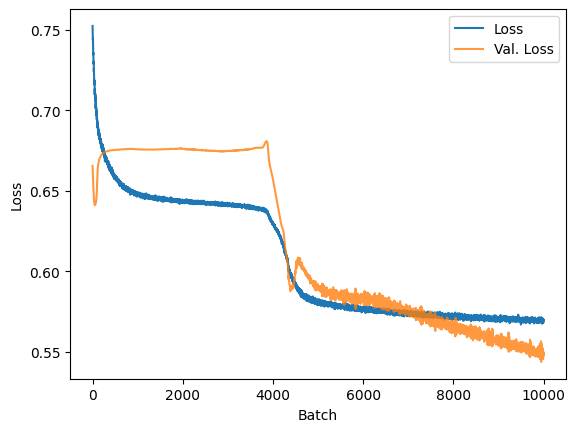

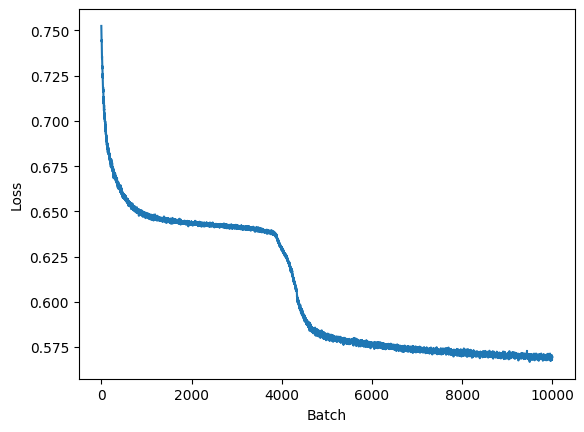

In [ ]:
# Instanciando modelo
model = Model().to(device=device)    

# Mudando a inicialização dos pesos   
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)

model.apply(weights_init)
# Função custo para treinamento
loss_function = nn.BCEWithLogitsLoss()

# Otimizador ADAM
optimizer = torch.optim.Adam(model.parameters(), lr=eta, betas=(0.9, 0.999))

# Listas para guardar o valor da função custo
# no treinamento e validação ao longo das iterações
losses = []
val_losses = []



for epoch in range(Ne):
    for n, (X, d) in enumerate(train_loader):
        X = X.to(device=device)
        d = d.to(device=device)
        
        # Necessário colocar o modelo em modo treinamento
        # na etapa de treinamento
        model.train()
        model.zero_grad()
        y = model(X)
        loss = loss_function(y, d)
        loss.backward()
        optimizer.step()

        # Validação
        # Necessário colocar o modelo em modo de inferência (eval)
        # pois algumas camadas têm comportamento diferente para inferência,
        # por exemplo, o Dropout.
        model.eval()

        # Cálculo da saída e valor da função custo com os dados de validação
        # Nesse caso, não é necessário calcular gradientes, por isso é utilizado
        # o bloco with torch.no_grad():
        with torch.no_grad():
            y_val = model(X_val)
            d_val = torch.reshape(d_val, (-1, 1))
            val_loss = loss_function(y_val, d_val)

        # Armazena o valor da função custo de treinamento e validação
        losses.append(loss.item())
        val_losses.append(val_loss.item())
        
        # Mostra os valores da função custo de treinamento e validação
        # a cada 100 épocas        
        if epoch % 100 == 0 and n == dados_treino.shape[0]//Nb - 1:
            print(f"Epoch: {epoch} Loss: {loss} Val. Loss: {val_loss}")

plt.figure()
plt.plot(losses)
plt.plot(val_losses, alpha=0.8)
plt.legend(["Loss", "Val. Loss"])
plt.xlabel("Batch")
plt.ylabel("Loss")

plt.figure()
plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("Loss")

In [366]:
import torch.nn.functional as F
model.eval()
test_loss = 0
correct = 0
VP_modelo = 0
VN_modelo = 0
FN_modelo = 0
FP_modelo = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        output = output[0]
        output = torch.reshape(output, (-1, 1))
        target = target.T
        for i in range(len(output)):
          if output[i]>0.5:
            output[i]=1
          else:
            output[i]=0
        #print(output)
        for j in range(len(output)):
          if output[j] == target[j][0]:
            correct+=1
        for j in range(len(y_test)):
          if (output[j] == 0) and (output[j] == target[j][0]):
            VN_modelo+=1
          elif (output[j] == 1) and (output[j] == target[j][0]):
            VP_modelo+=1
          elif (output[j] == 0) and (output[j] != target[j][0]):
            FN_modelo+=1
          elif (output[j] == 1) and (output[j] != target[j][0]):
            FP_modelo+=1   

# Dividiremos pelo shape[1] devido as dimensões da entrada e saida do modelo
acuracia_modelo = (correct/x_test.shape[1])/(x_test.shape[0])
print(f"Acurácia: {(correct/x_test.shape[1])}/{x_test.shape[0]} ({acuracia_modelo*100:.0f}%)")

VP_modelo = VP_modelo/8
VN_modelo = VN_modelo/8
FN_modelo = FN_modelo/8
FP_modelo = FP_modelo/8


# Calculando o F1 Score
precisao_modelo = (VP_modelo)/(VP_modelo+FP_modelo)
sensibilidade_modelo = (VP_modelo)/(VP_modelo+FN_modelo)
F1Score_modelo = 2*(precisao_modelo*sensibilidade_log)/(precisao_modelo+sensibilidade_modelo)
print(f'O F1-Score é de: {F1Score_modelo}')
matriz_confu_modelo = [[VP_modelo, FP_modelo], [FN_modelo, VN_modelo]]
print('\nA Matriz de Confusão é:')
print(matriz_confu_modelo[0])
print(matriz_confu_modelo[1])

Acurácia: 109.0/154 (71%)
O F1-Score é de: 1.0786516853932584

A Matriz de Confusão é:
[22.0, 18.0]
[27.0, 87.0]


A partir dos dados coletados, podemos perceber que o modelo Regressão Logística é bem menos preciso, devido a sua natureza que não leva em conta diversos fatores como pesos, bias, divergência, e afins.